In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-census-income-dataset/adult.csv


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv("/kaggle/input/adult-census-income-dataset/adult.csv")
df



,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
# lets understand the disrtibution and basic knowledge of dataset
print(f"Shape of dataset {df.shape}")
print("==="*30)
print(f"Feature name are {list(df.columns)}")
print("==="*30)
print(f"datatypes of each feature \n {df.dtypes}")
print("==="*30)
print(f"numerical datatypes features are {df.select_dtypes(include = np.number).columns.tolist()}")
print("==="*30)
print(f"object datatypes feature are {df.select_dtypes(include = 'O').columns.tolist()}")
print("==="*30)
print(f"Information of dataset {df.info()}")
print("==="*30)
print(f"describtion of numerical columns \n {df.describe()}")
print("==="*30)
print(f"descrption for non integer columne \n{df.describe(include = 'O')}")
print("==="*30)

Shape of dataset (32561, 15)
Feature name are ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']
datatypes of each feature 
 age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object
numerical datatypes features are ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
object datatypes feature are ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 

In [5]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [6]:
# lets check for null values
df[df=="?"].count()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
df.replace("?",np.NaN,inplace = True)

In [8]:
# lets check for data distribution
# lets cehck for null values
for col in df.columns:
    print("=="*40)
    print(f"for column {col}")
    print(f"   number of null values :{df[col].isnull().sum()}")
    print(f"   percentage of null values :{df[col].isna().mean()*100:.2f} %")
    print(f"        number of unique values in  {col} are {df[col].nunique()}")

for column age
   number of null values :0
   percentage of null values :0.00 %
        number of unique values in  age are 73
for column workclass
   number of null values :1836
   percentage of null values :5.64 %
        number of unique values in  workclass are 8
for column fnlwgt
   number of null values :0
   percentage of null values :0.00 %
        number of unique values in  fnlwgt are 21648
for column education
   number of null values :0
   percentage of null values :0.00 %
        number of unique values in  education are 16
for column education.num
   number of null values :0
   percentage of null values :0.00 %
        number of unique values in  education.num are 16
for column marital.status
   number of null values :0
   percentage of null values :0.00 %
        number of unique values in  marital.status are 7
for column occupation
   number of null values :1843
   percentage of null values :5.66 %
        number of unique values in  occupation are 14
for column relatio

In [9]:
# lets specfic the null values of workclass with no workclass
df["workclass"].replace(np.nan,"noclass",inplace = True)

# lets replace the occuption with nowork
df["occupation"].replace(np.nan,"nowork",inplace = True)

## Insights

In [10]:
# import library 
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

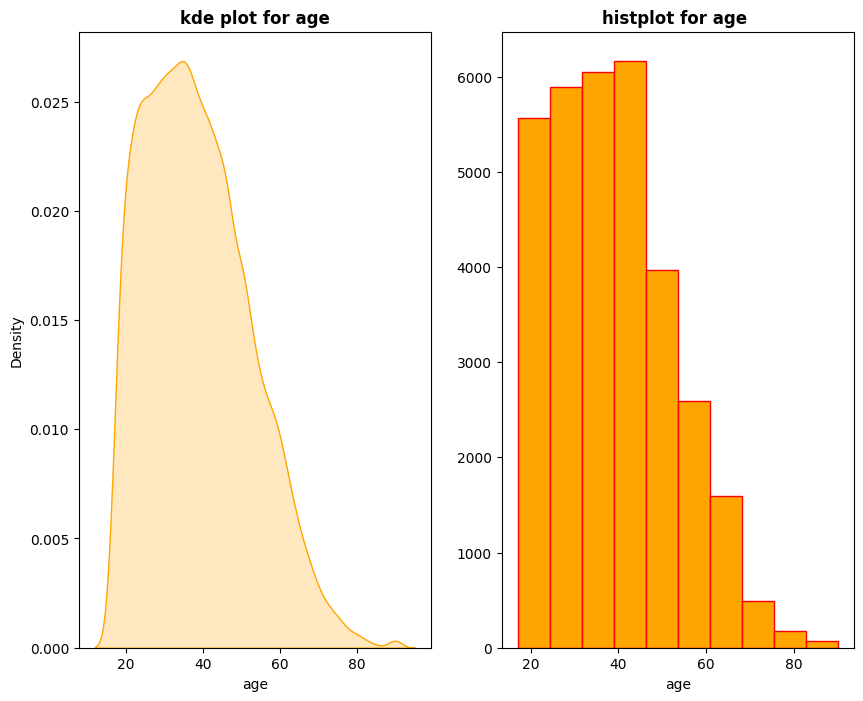

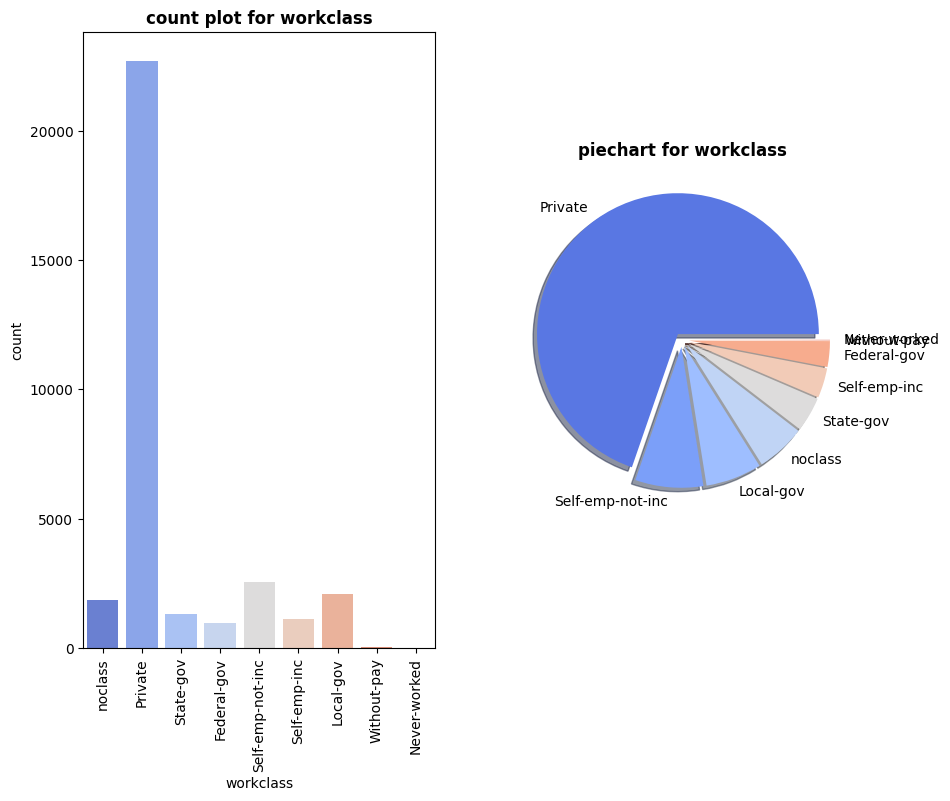

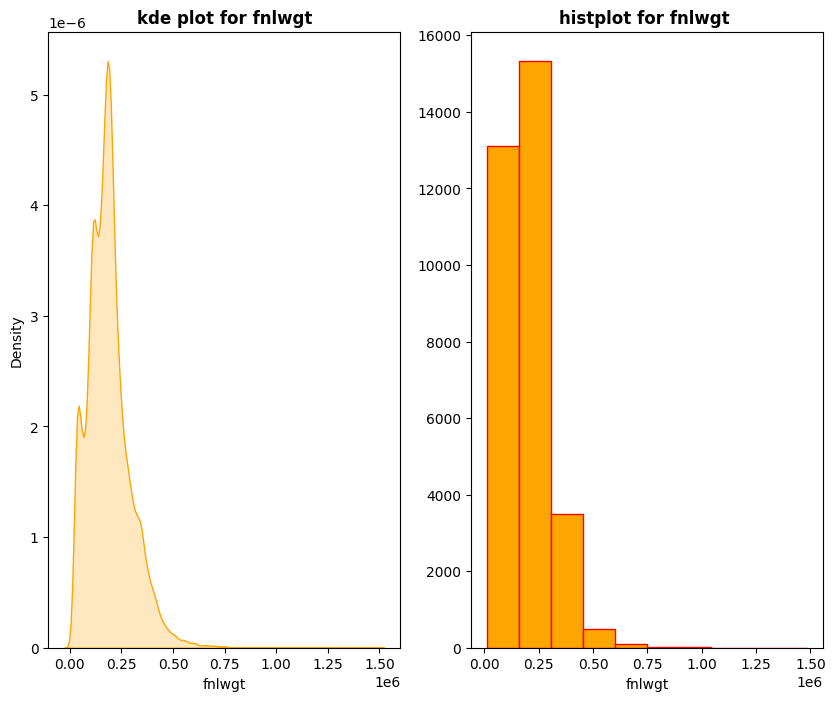

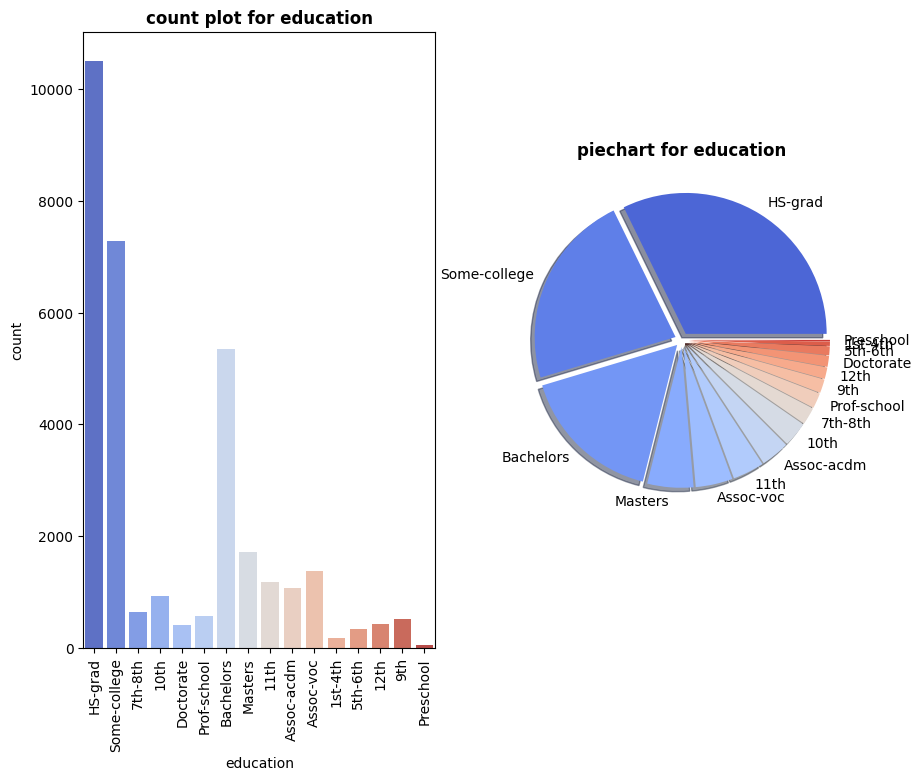

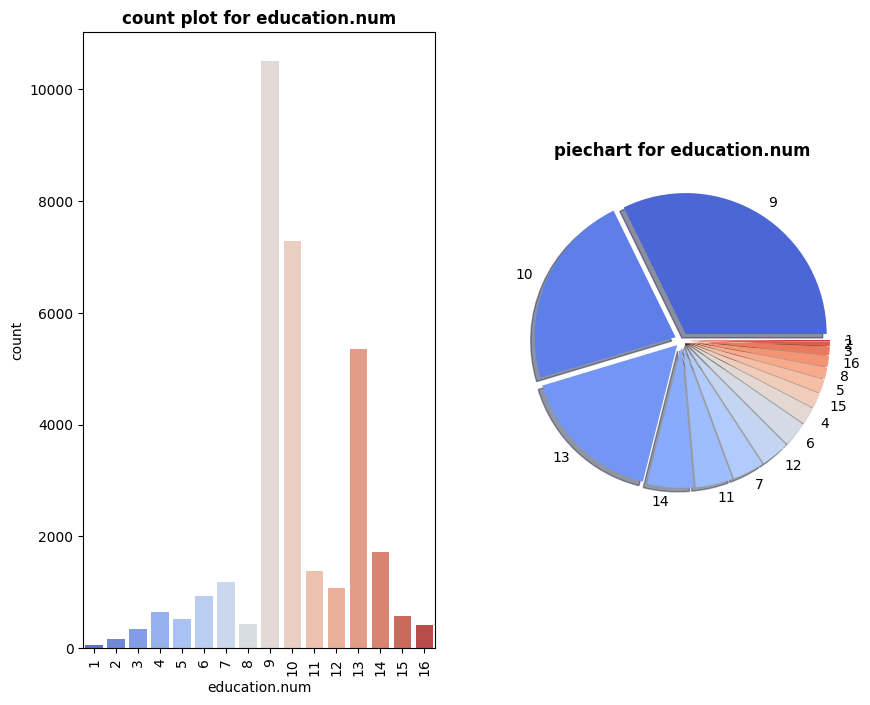

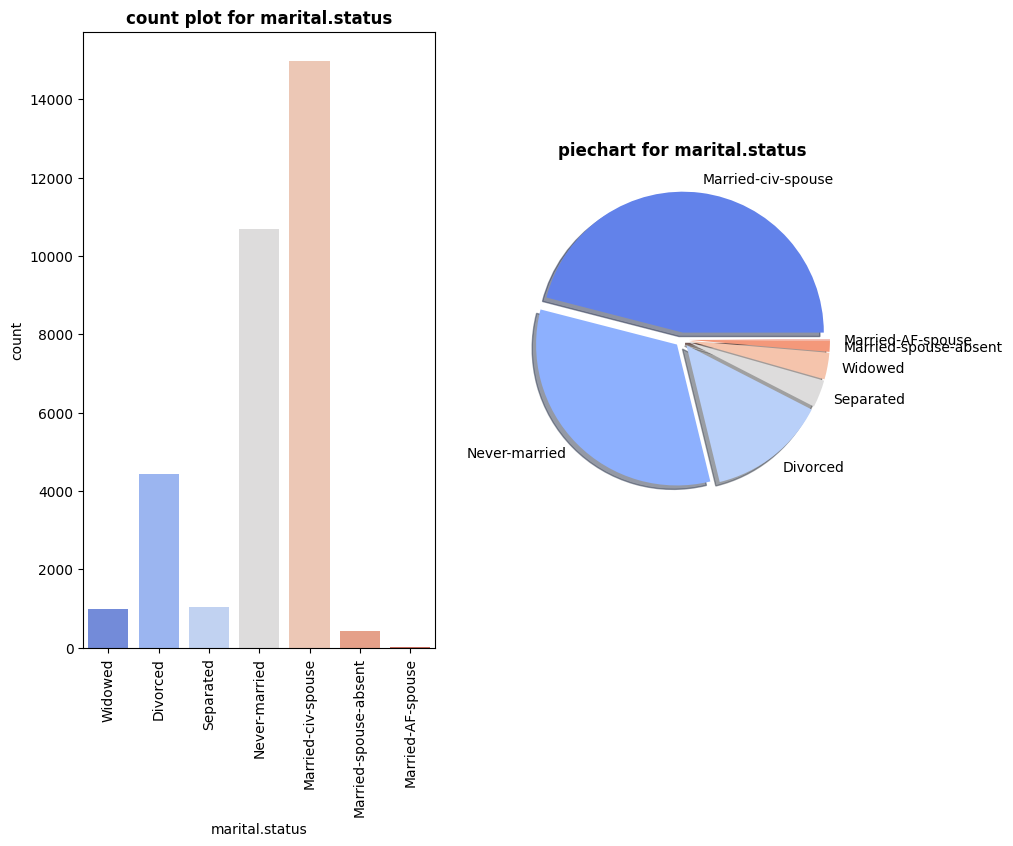

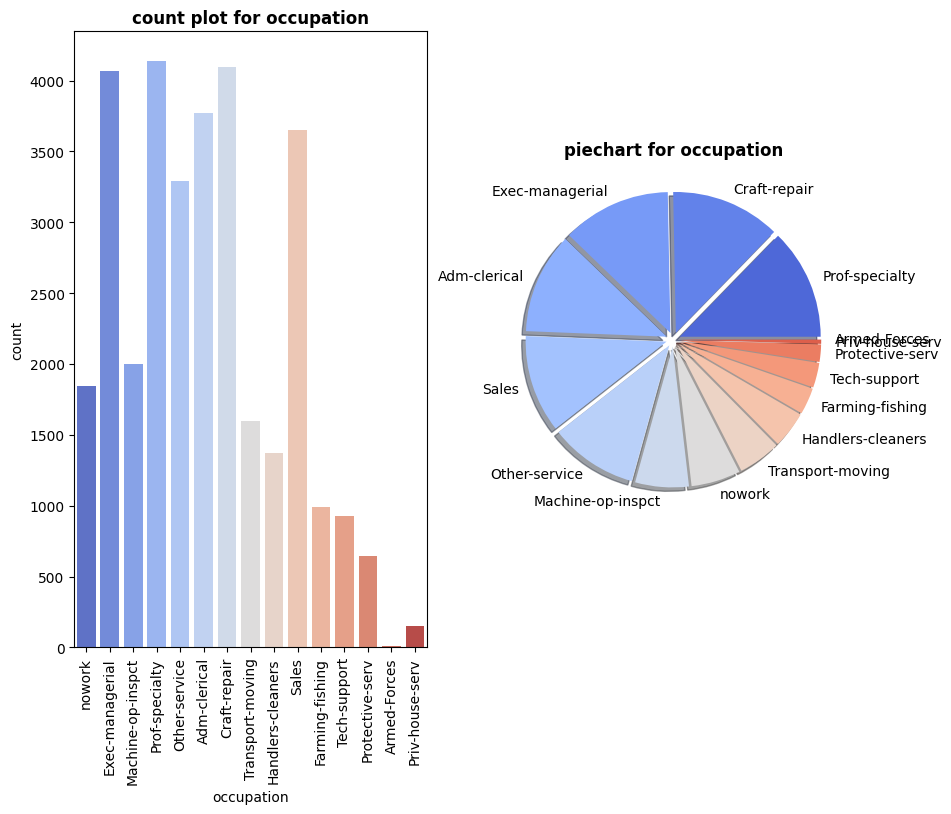

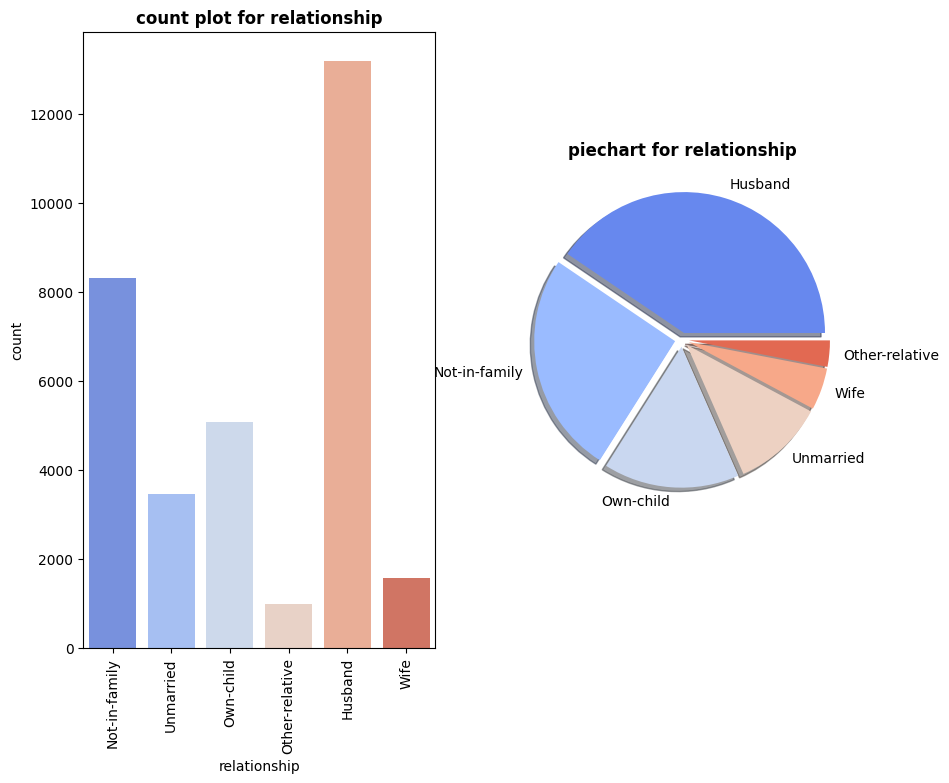

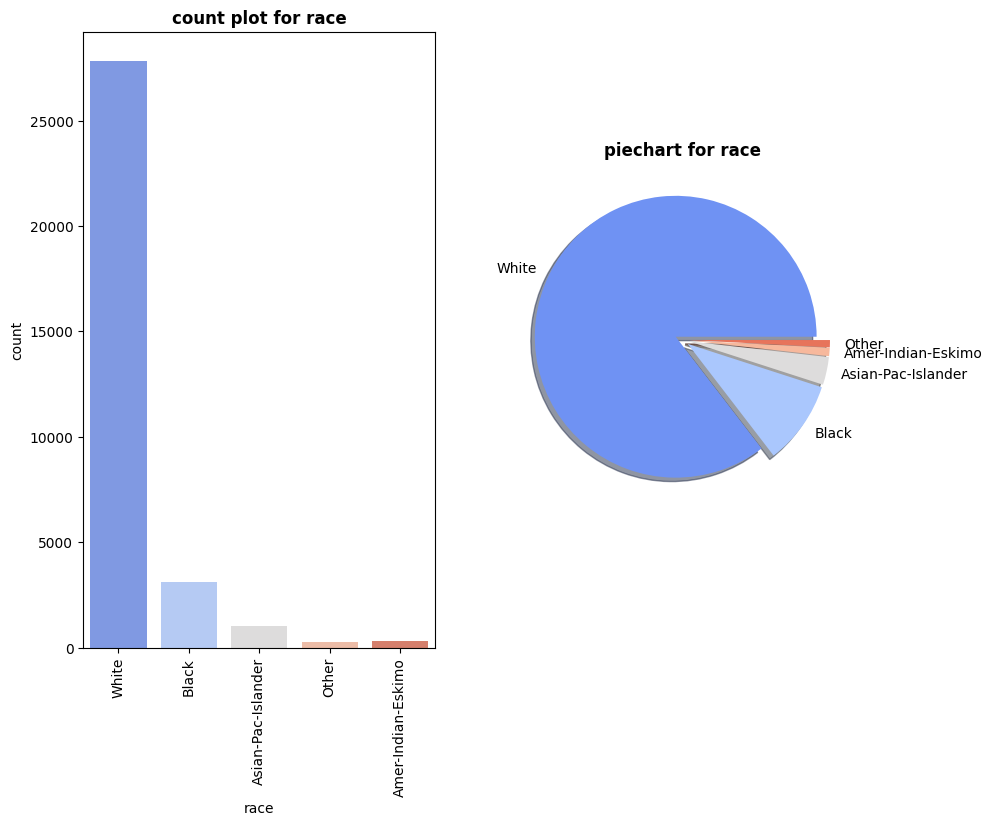

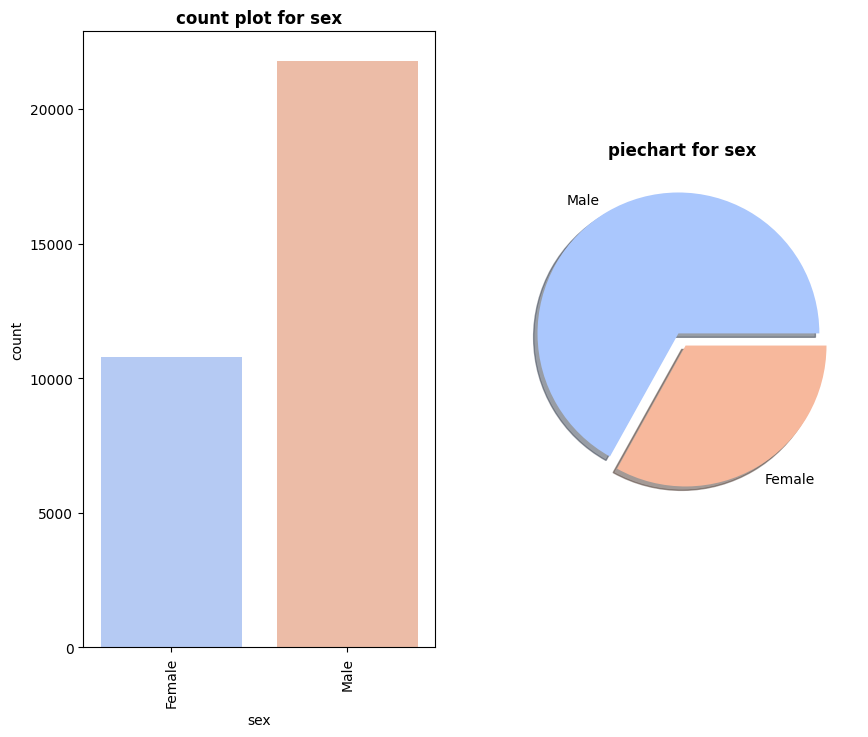

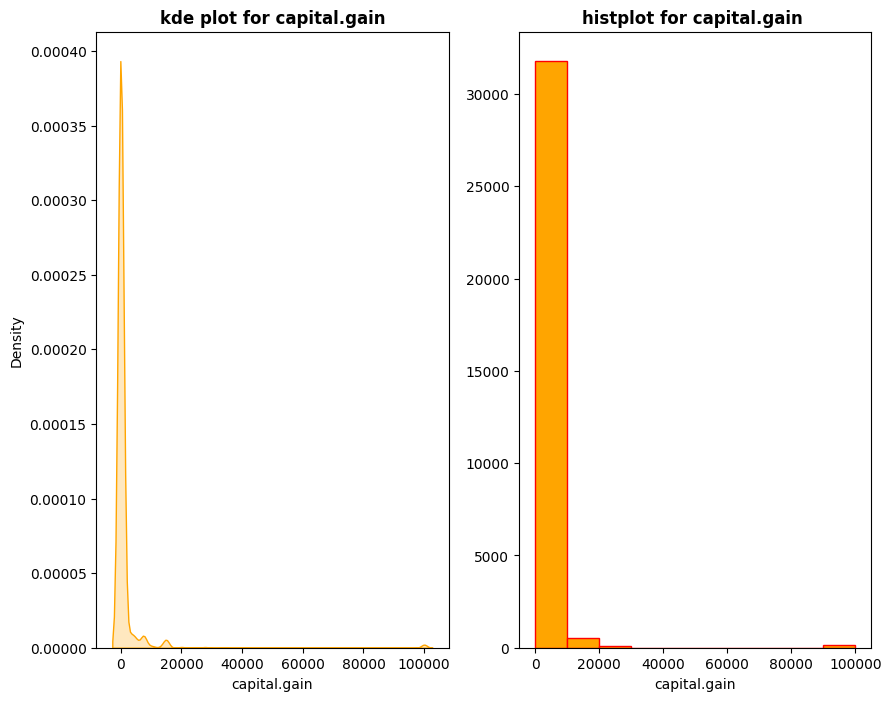

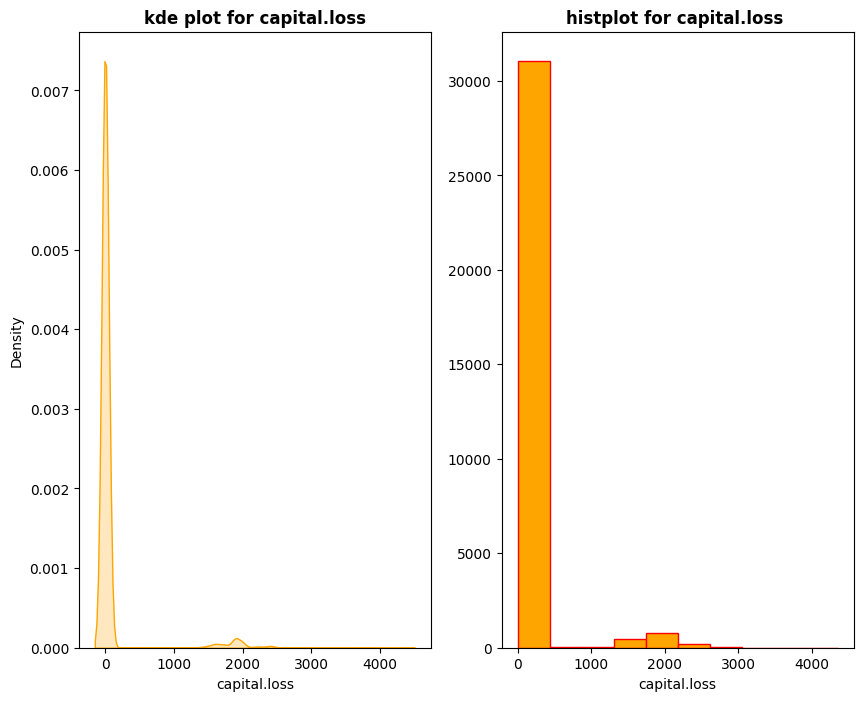

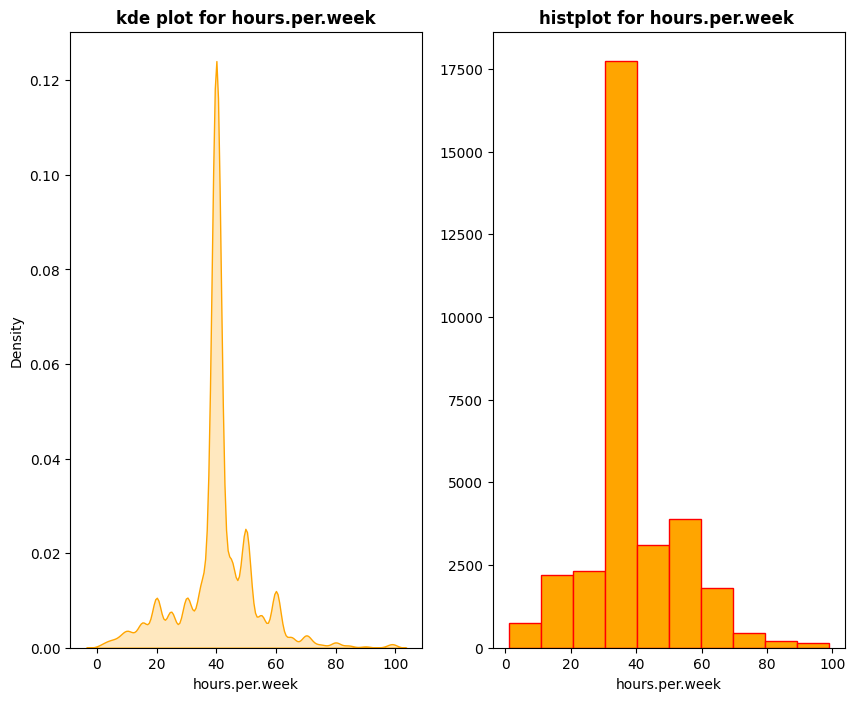

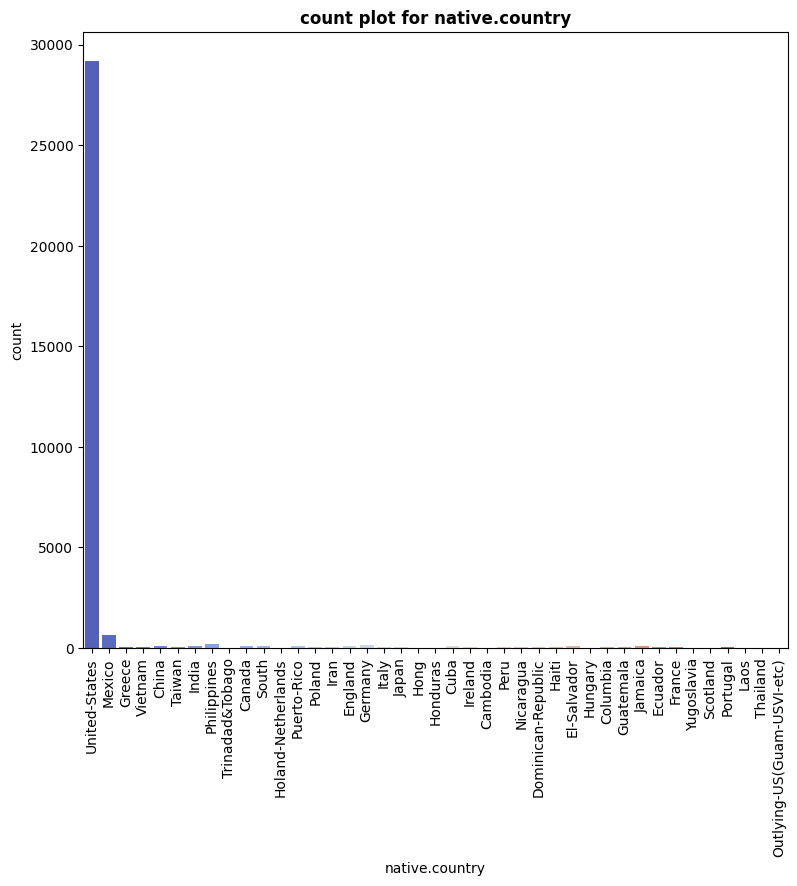

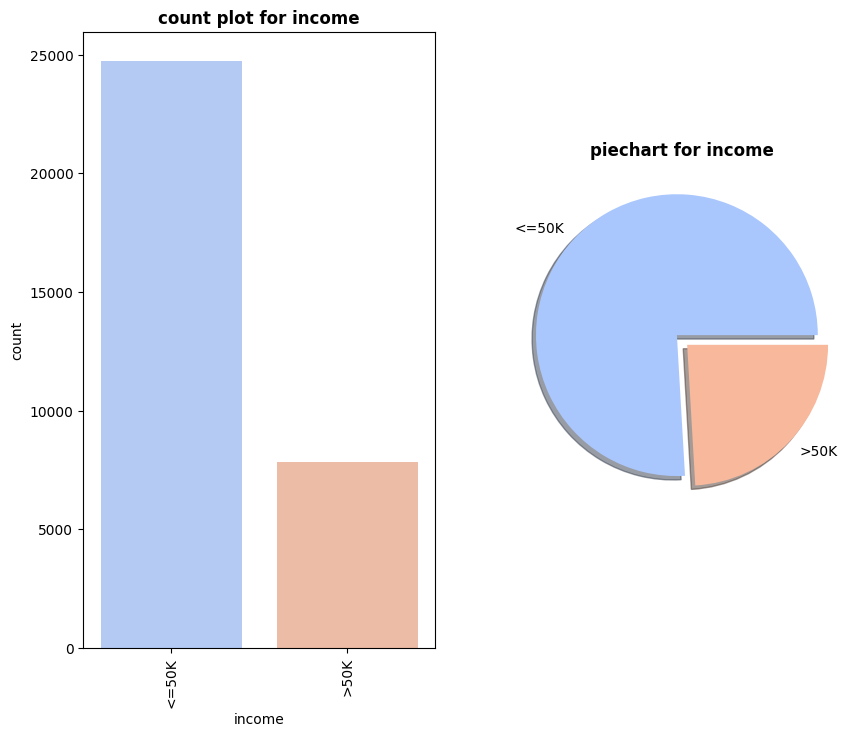

In [12]:
# lets undertsand the data
for col in df.columns:
    if df[col].nunique() >20 :
        if col == "native.country":
            
            plt.figure(figsize = (20,8))
            plt.subplot(1,2,1)
            # Get category order and color palette
            values = df[col].value_counts()
            categories = values.index
            colors = sns.color_palette("coolwarm", len(categories))
            sns.countplot(x = col,data = df,palette = colors )
            plt.xticks(rotation = 90)
            plt.title(f"count plot for {col}",fontweight = "bold")
            plt.show()
        else:
            
            plt.figure(figsize = (10,8))
            # for feature having more categories i.e mainly numerical distribution 
            plt.subplot(1,2,1)
            sns.kdeplot(x= col,data = df,fill = True,color = "orange" )
            plt.title(f"kde plot for {col}",fontweight = "bold")
    
            plt.subplot(1,2,2)
            plt.hist(x = col ,data = df,color = "orange",edgecolor = "red")
            plt.title(f"histplot for {col} ",fontweight = "bold")
            plt.xlabel(f"{col}")
    
            plt.show()

    else:
        plt.figure(figsize = (10,8))
        plt.subplot(1,2,1)
        # Get category order and color palette
        values = df[col].value_counts()
        categories = values.index
        colors = sns.color_palette("coolwarm", len(categories))
        sns.countplot(x = col,data = df,palette = colors )
        plt.xticks(rotation = 90)
        plt.title(f"count plot for {col}",fontweight = "bold")

        plt.subplot(1,2,2)
        plt.pie(x = df[col].value_counts(),labels = df[col].value_counts().index,explode = [0.05]*len(df[col].value_counts()),shadow = True,colors = colors)
        plt.title(f"piechart for {col}",fontweight = "bold")
        
        plt.show()
        

In [13]:
# here we can observe that data is not balanced
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

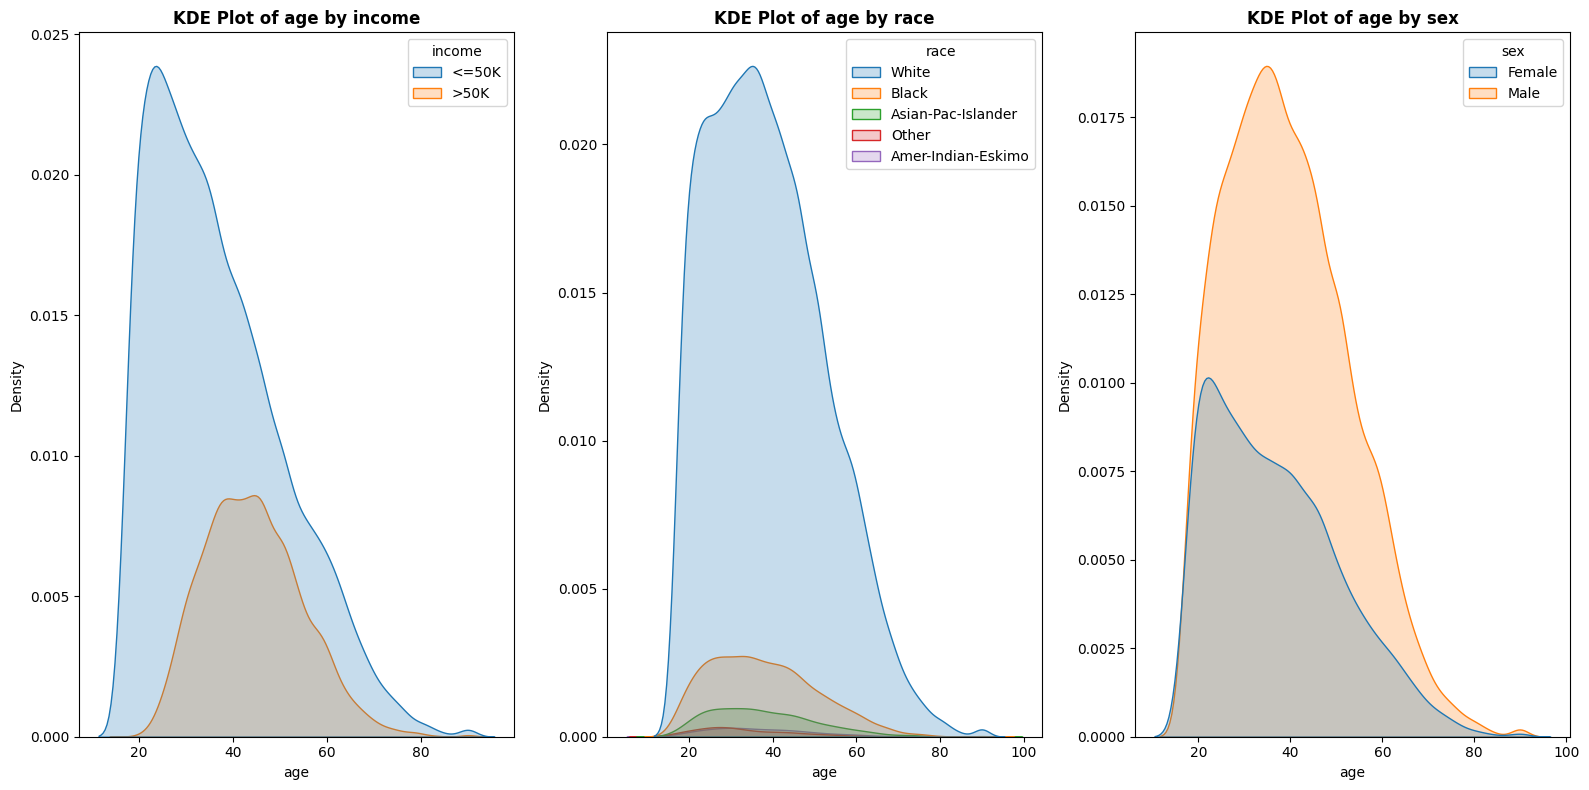

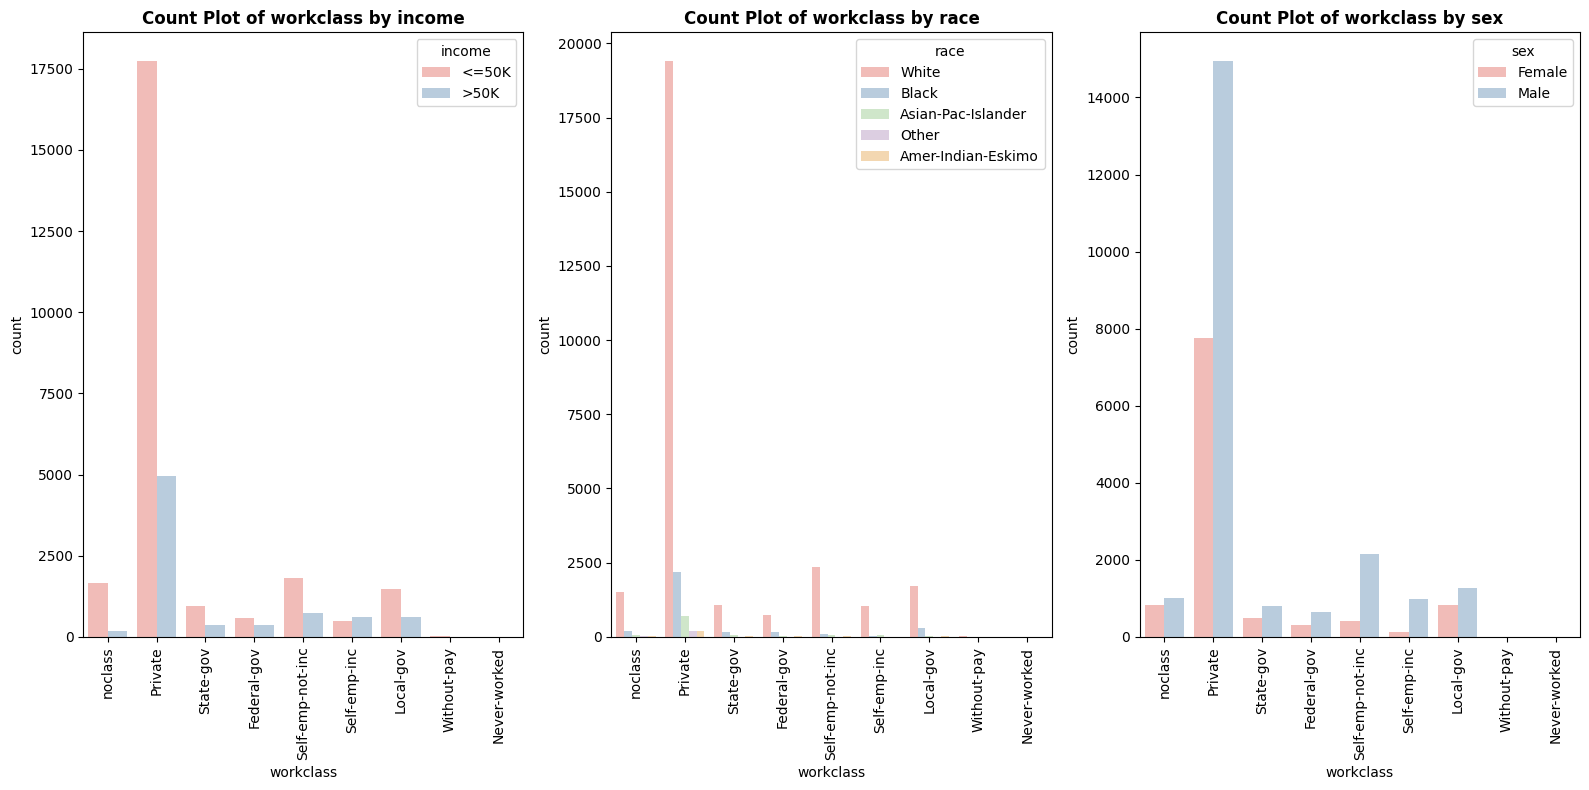

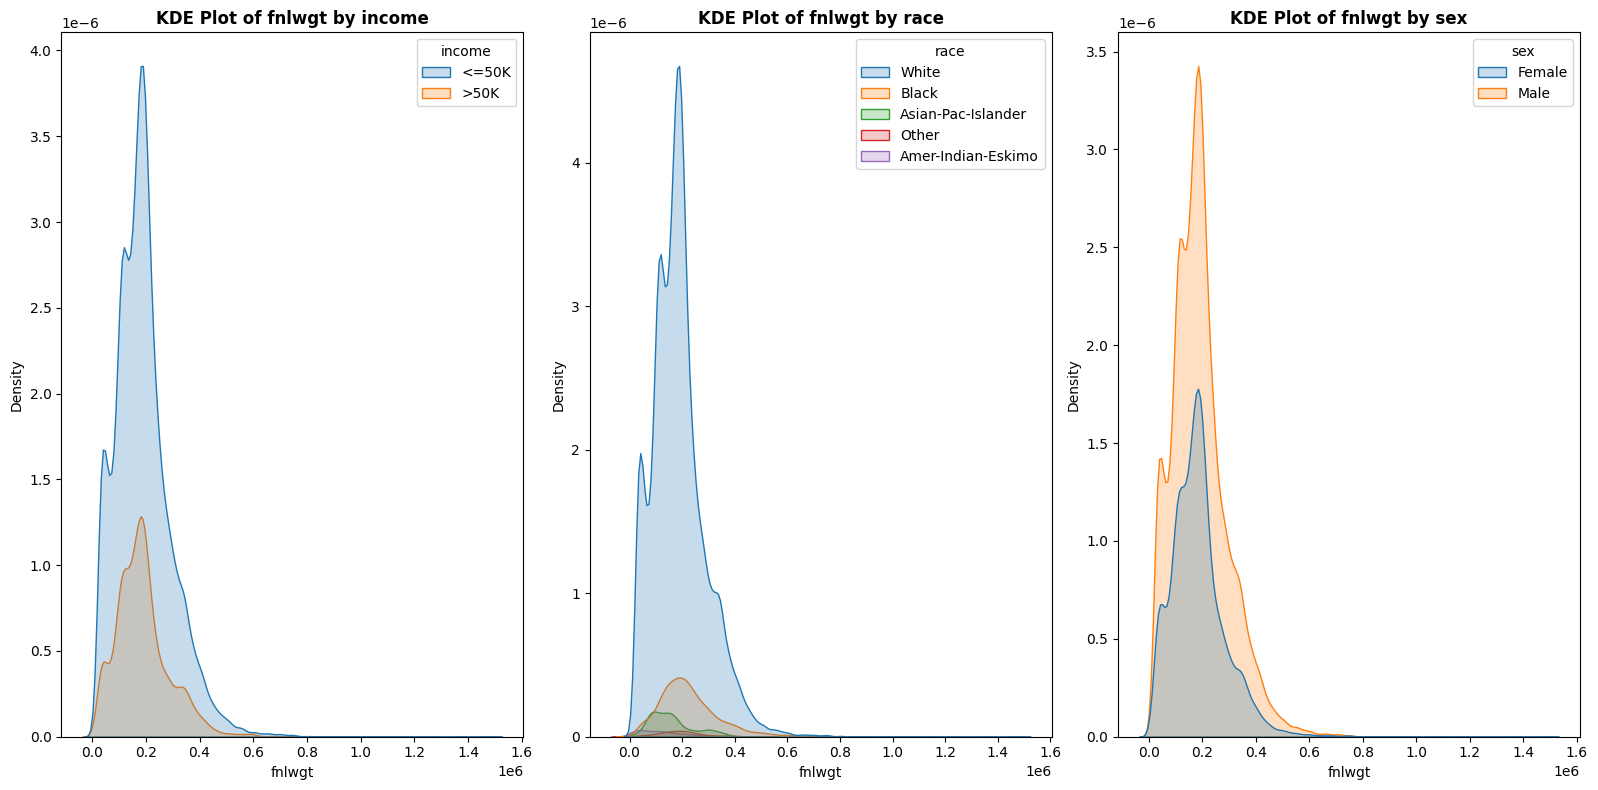

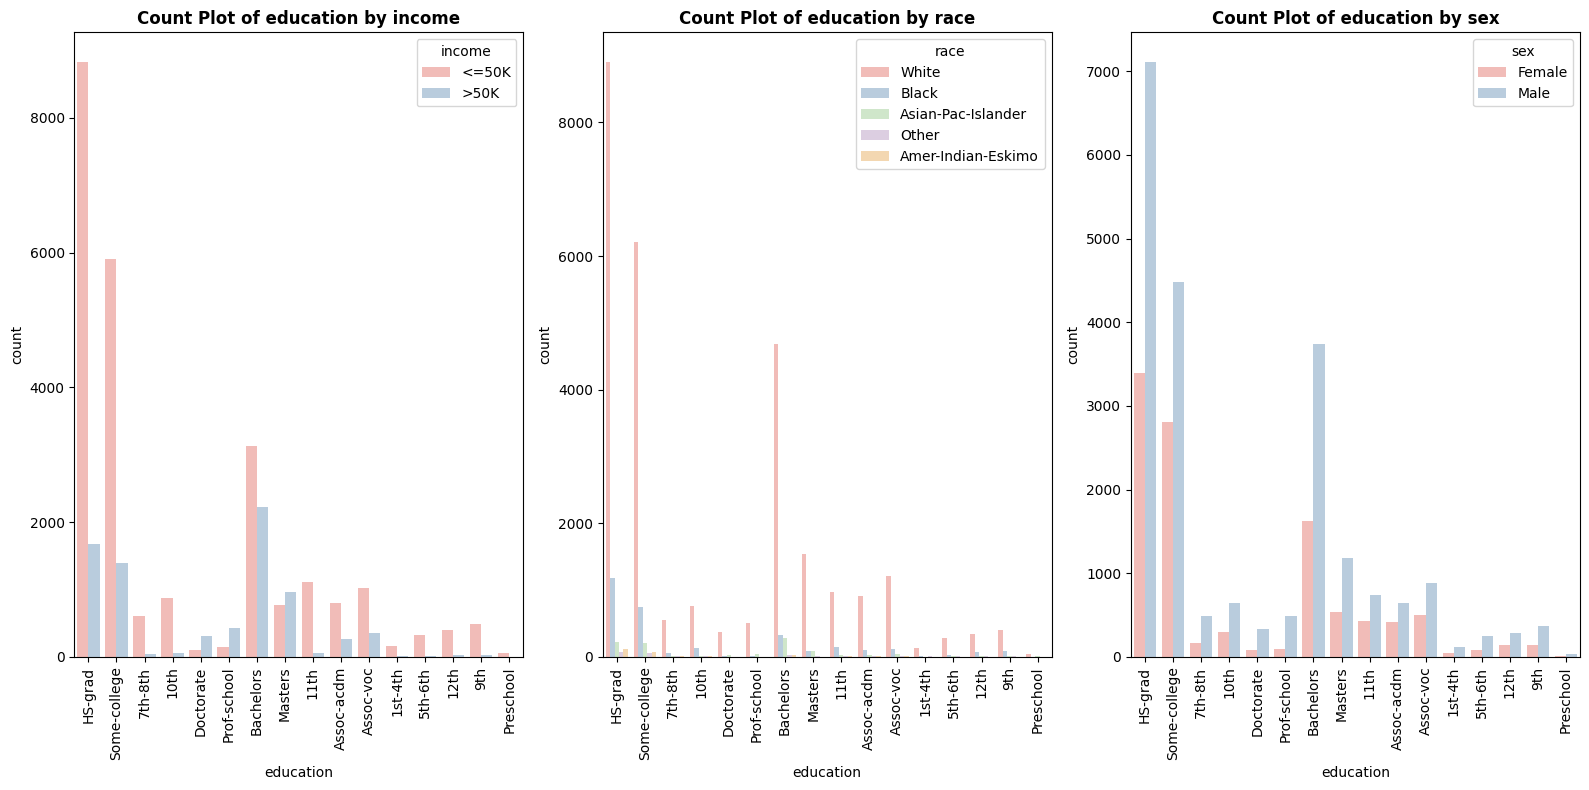

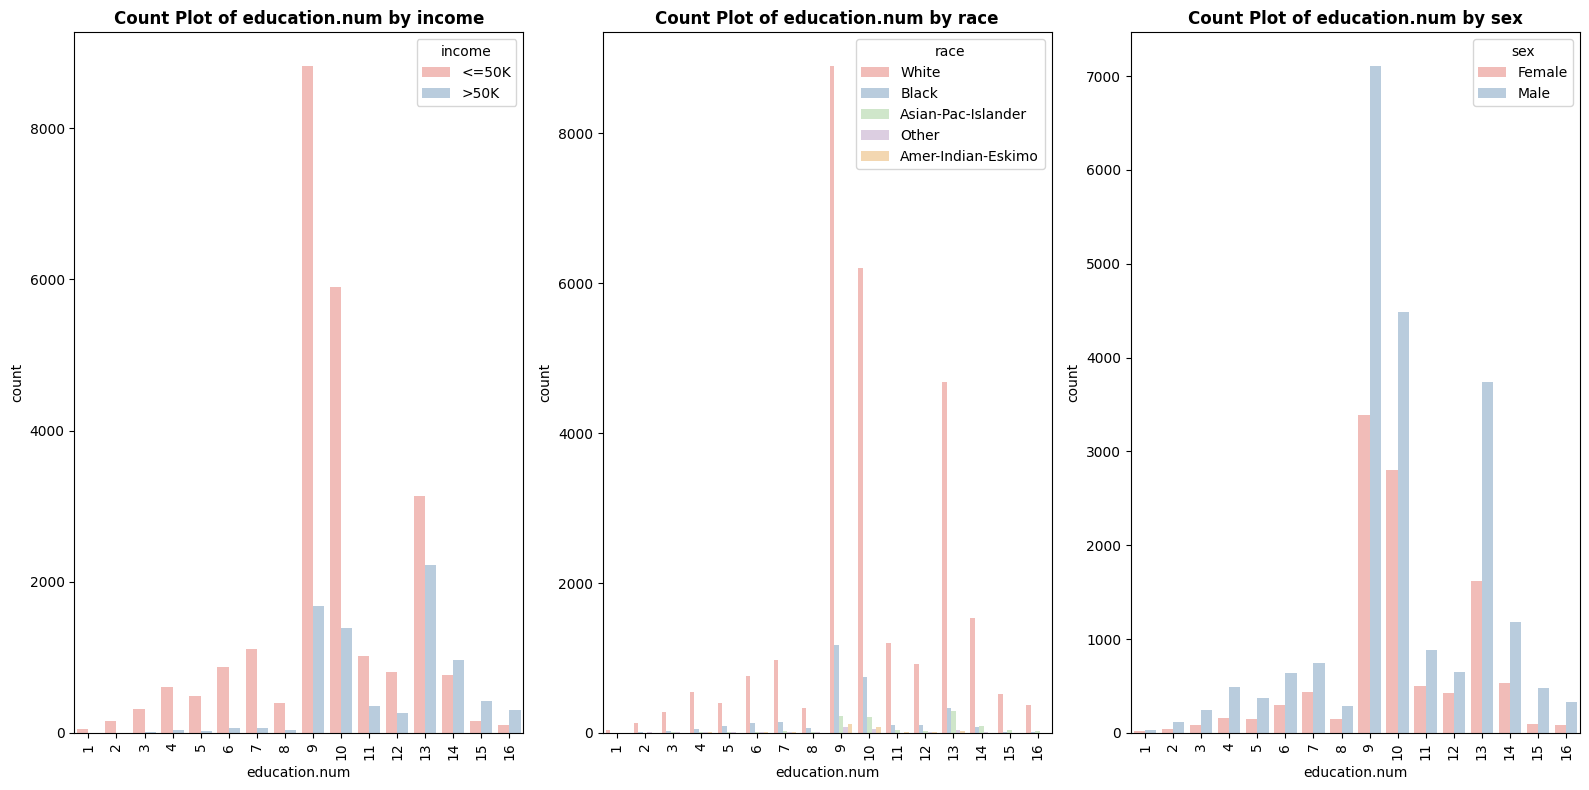

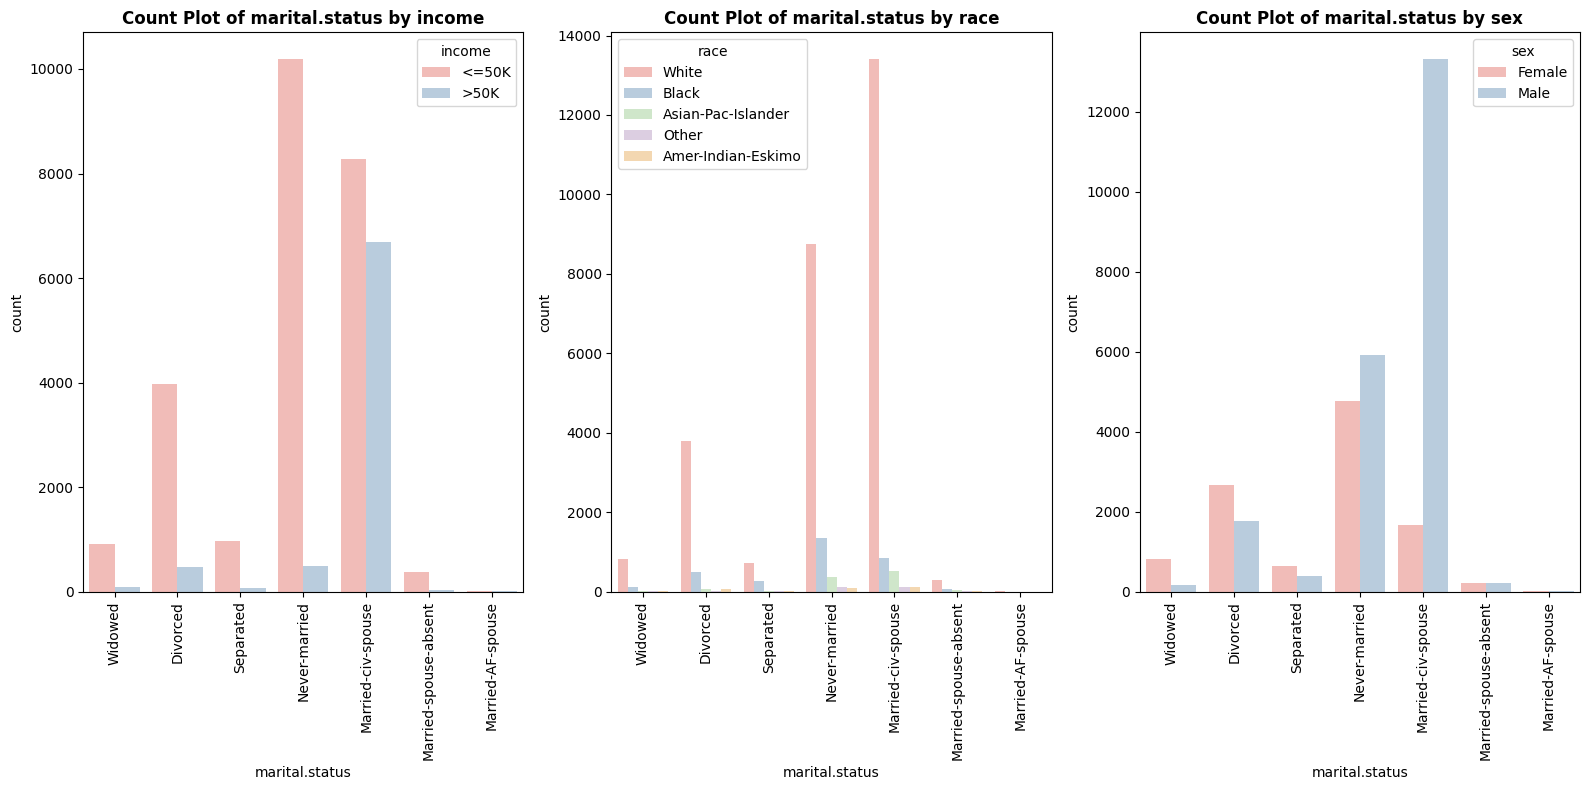

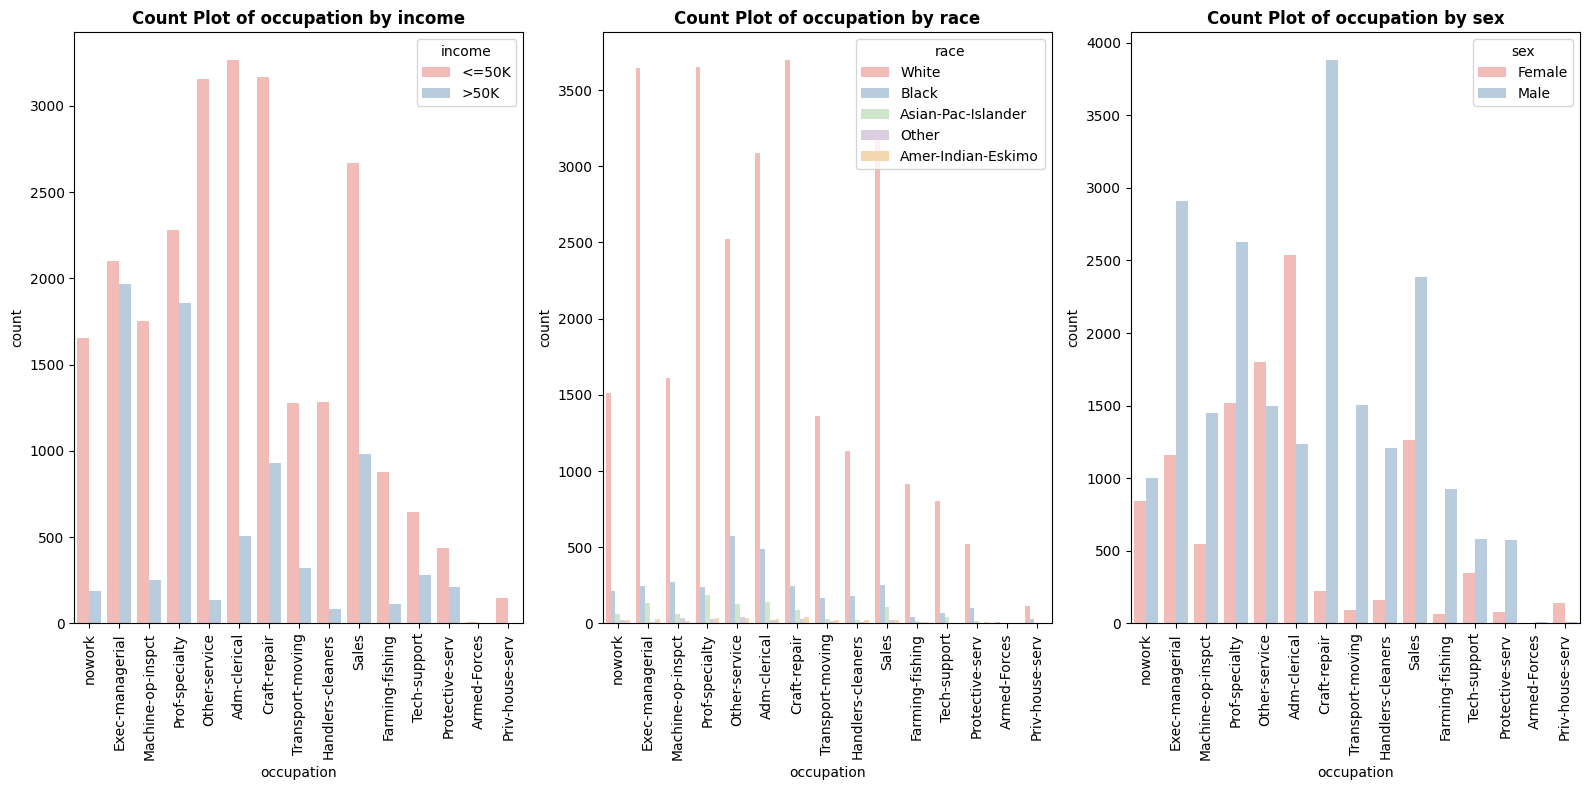

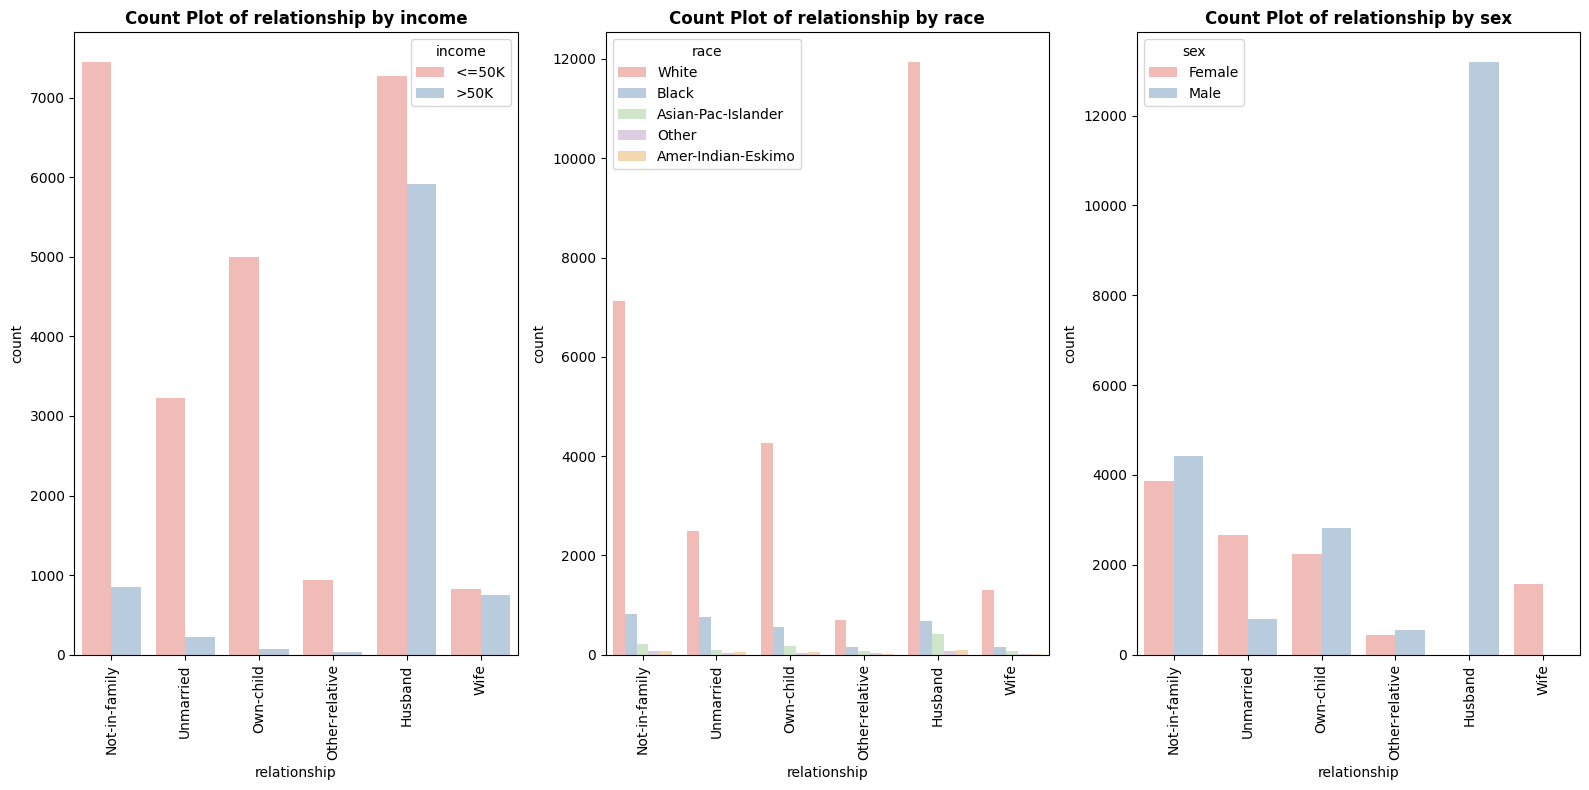

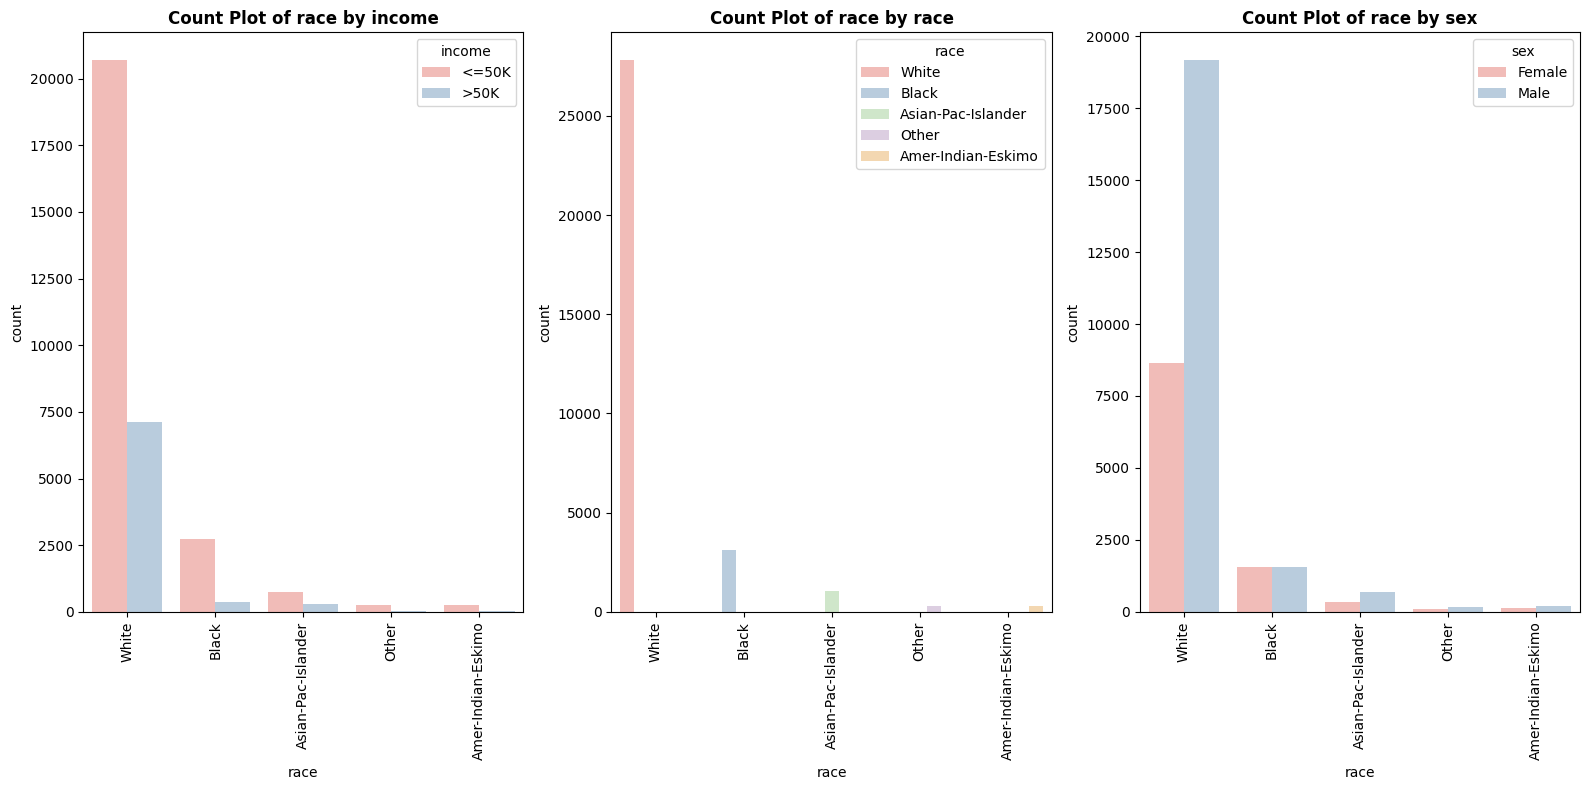

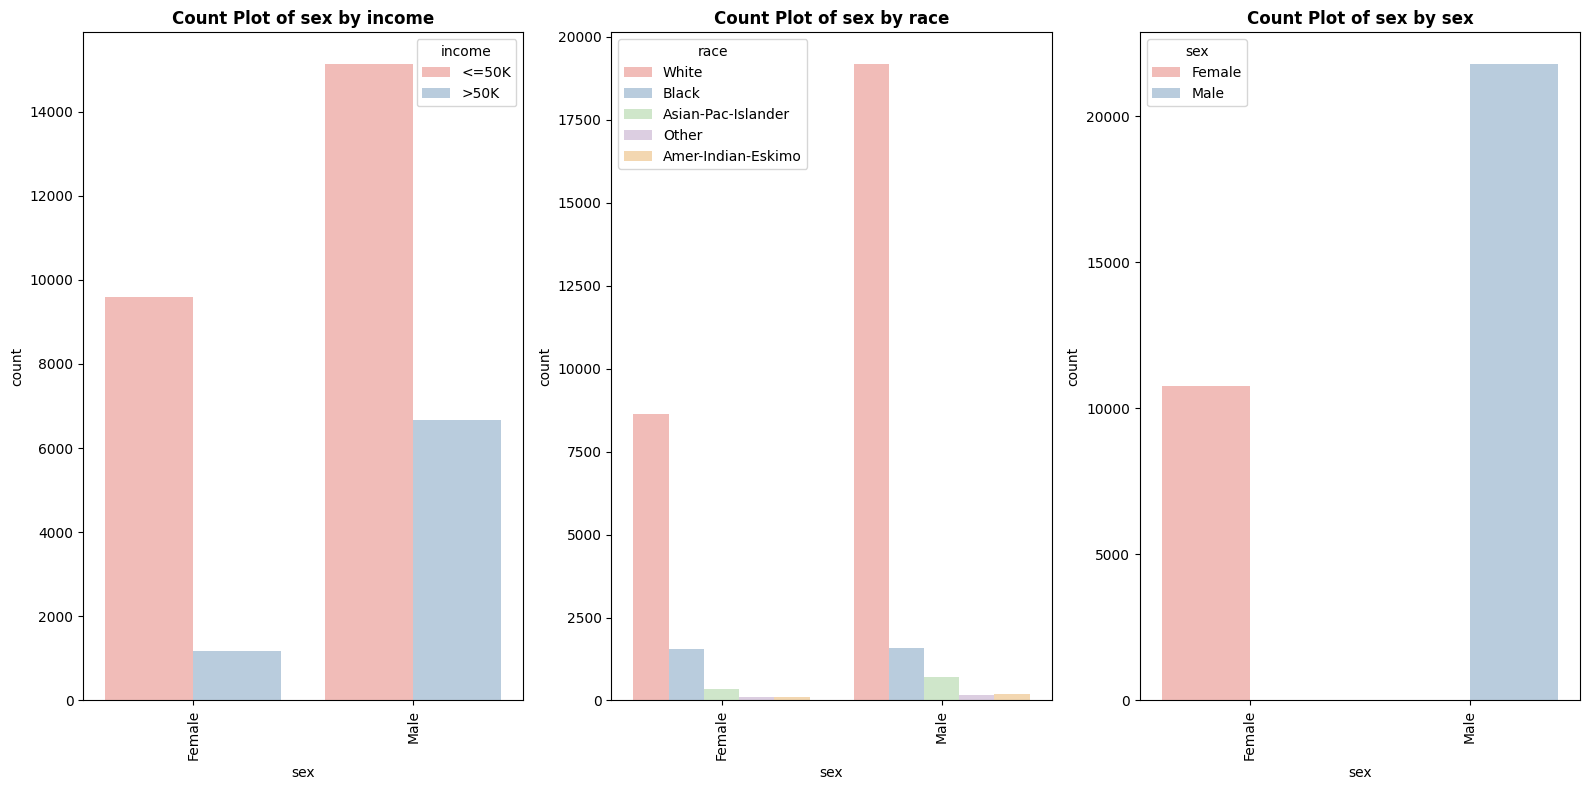

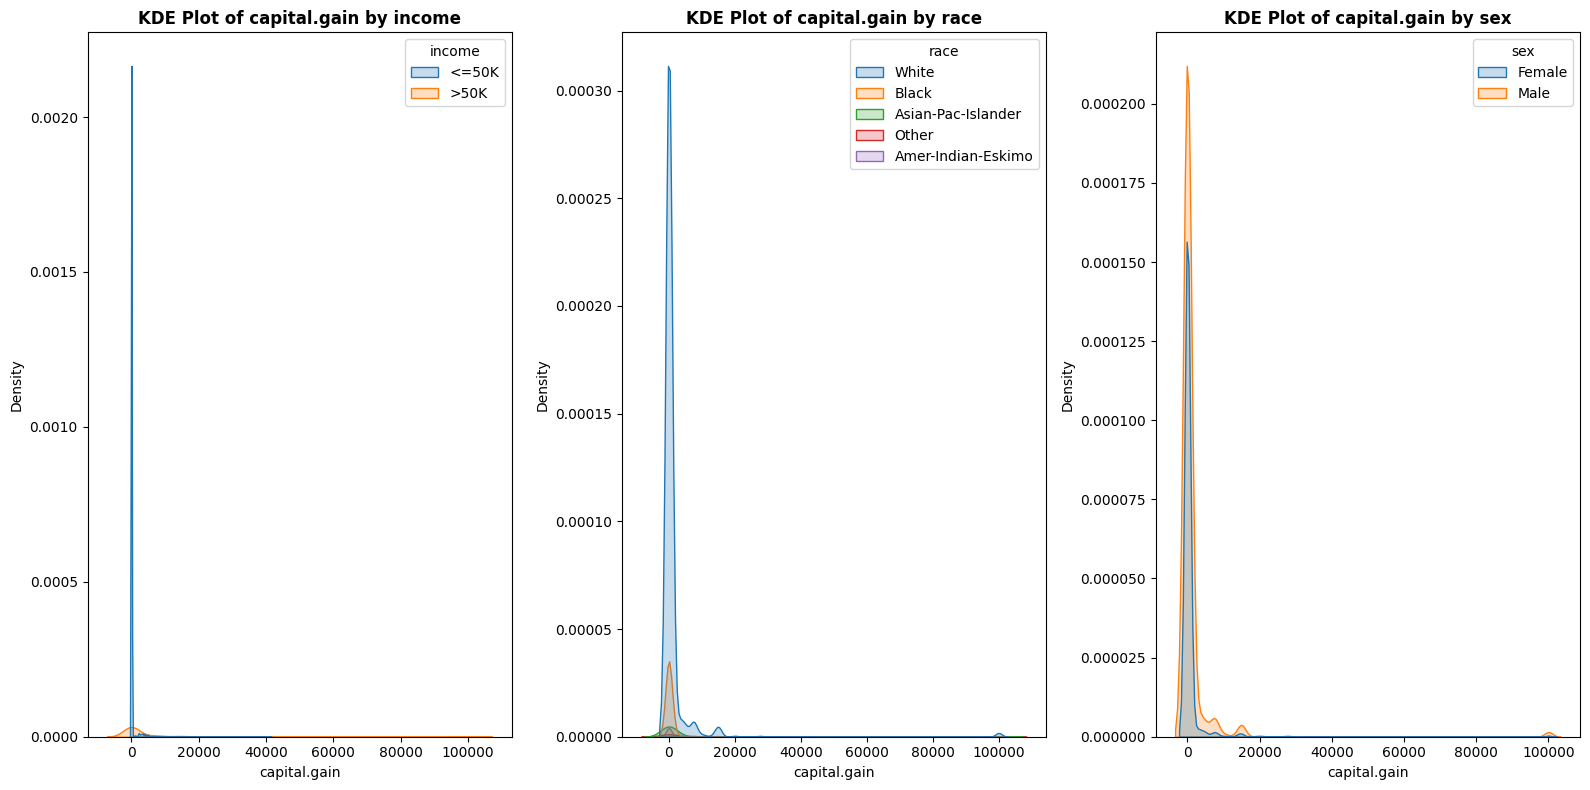

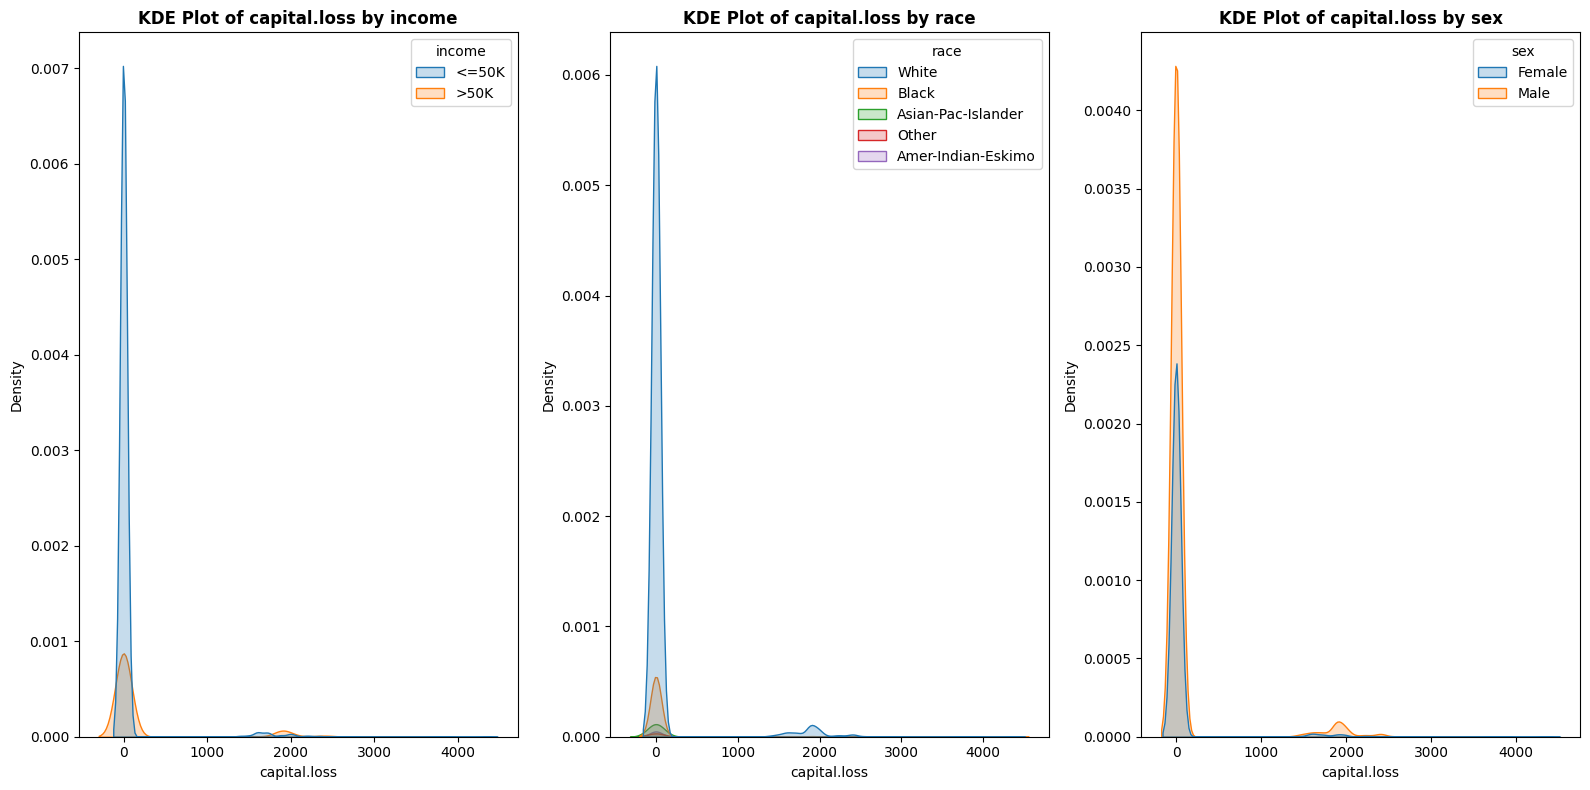

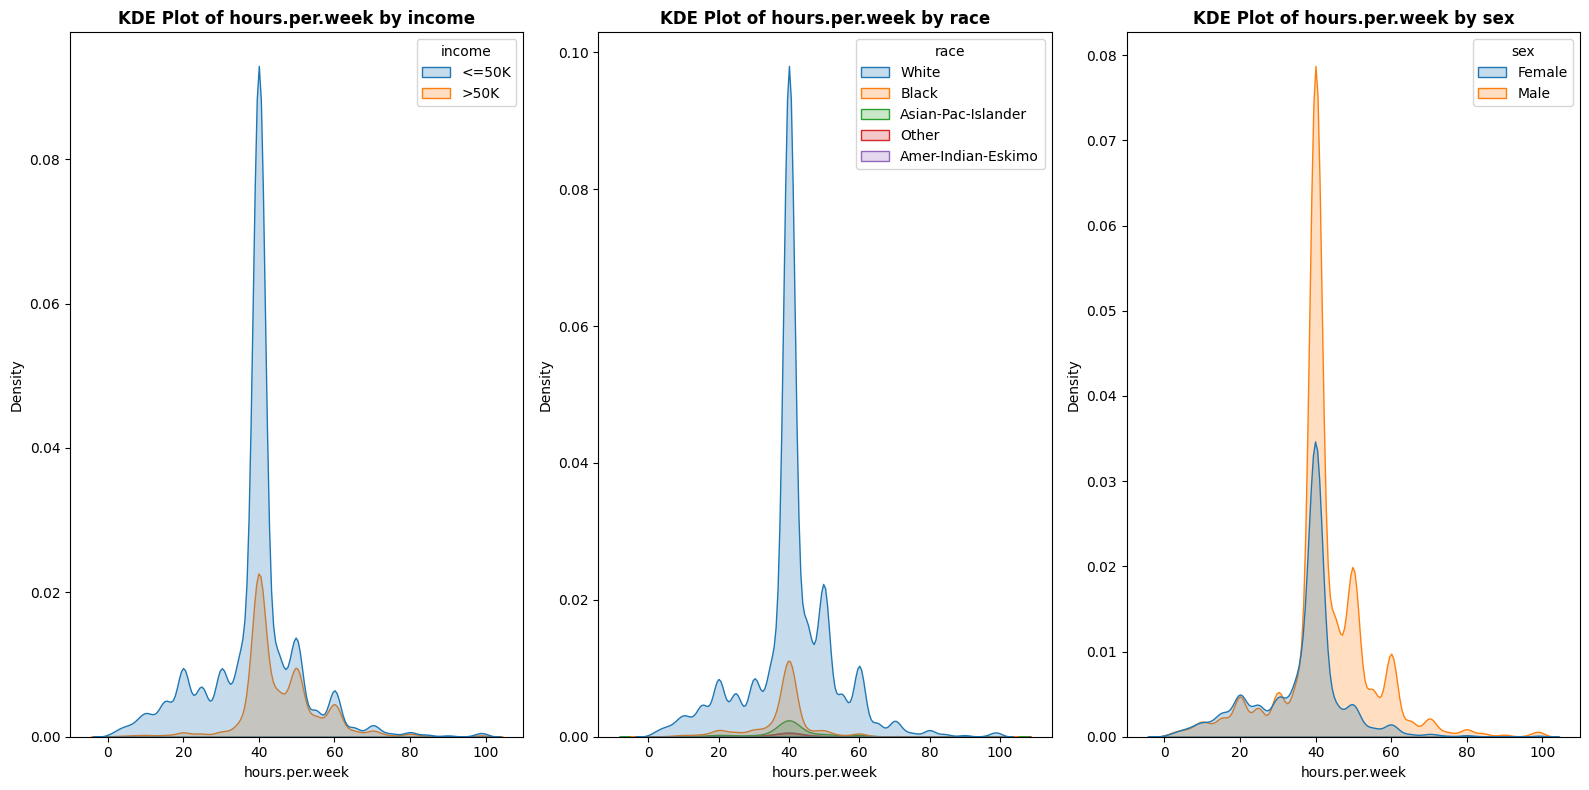

In [14]:
# LETS UNDERTSAND THE DISTRIBTUION USING OUR TAREGT FEATURE I.E INCOME
# lets undertsand the data
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.drop(columns=["native.country", "income"]):
    
    # For continuous/numerical columns
    if df[col].nunique() > 20:
        plt.figure(figsize=(16, 8))
        
        for i, x in enumerate(["income", "race", "sex"], 1):
            plt.subplot(1, 3, i)
            sns.kdeplot(x=col, data=df, hue=x, fill=True)
            plt.title(f"KDE Plot of {col} by {x}", fontweight="bold")
        
        plt.tight_layout()
        plt.show()

    # For categorical/discrete columns
    else:
        plt.figure(figsize=(16, 8))
        
        for i, x in enumerate(["income", "race", "sex"], 1):
            plt.subplot(1, 3, i)
            sns.countplot(x=col, data=df, hue=x, palette="Pastel1")
            plt.xticks(rotation=90)
            plt.title(f"Count Plot of {col} by {x}", fontweight="bold")
        
        plt.tight_layout()
        plt.show()

            

In [15]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,noclass,77053,HS-grad,9,Widowed,nowork,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,noclass,186061,Some-college,10,Widowed,nowork,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
